## Importing Libraries 

## Data

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

import keras

from tensorflow import keras 
import tensorflow.keras as k 
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense 

from tqdm.notebook import tqdm 

In [9]:
from keras.preprocessing.image import ImageDataGenerator, load_img

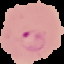

In [10]:
load_img("../Notebook/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png", target_size= (64,64))

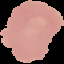

In [11]:
load_img("../Notebook/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_108.png", target_size = (64,64))

In [12]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [17]:
image_dir = "../Notebook/cell_images/"
size = 64
dataset = []
label = []


In [19]:
parasitized_img = os.listdir(image_dir+"Parasitized/")
parasitized_img = parasitized_img

for i, img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir+"Parasitized/" + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size)) 
        
        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/13800 [00:00<?, ?it/s]

In [20]:
len(parasitized_img)

13800

In [22]:
uninfected_img = os.listdir(image_dir+"Uninfected/")
uninfected_img = uninfected_img

for i, img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir+"Uninfected/" + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size)) 
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [23]:
len(uninfected_img)

13780

In [24]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2,random_state= 0)

## CNN model architecture

In [25]:
INPUT_SHAPE= (size, size, 3)

#input  layer 
inp = k.Input(shape = INPUT_SHAPE)

#Convolution layer 1
conv1 = Conv2D(32, kernel_size =(3,3), activation  = 'relu', padding = "same")(inp)
pool1 = MaxPool2D(pool_size = (2,2))(conv1)
norm1 = BatchNormalization(axis = -1)(pool1)
drop1 = Dropout(rate = 0.2)(norm1)

#Convolution layer  2
conv2 = Conv2D(32, kernel_size =(3,3), activation  = 'relu', padding = "same")(drop1)
pool2 = MaxPool2D(pool_size = (2,2))(conv2)
norm2 = BatchNormalization(axis = -1)(pool2)
drop2 = Dropout(rate = 0.2)(norm2)

flat = Flatten()(drop2)

#hidden layer 1
hidden1 = Dense(512, activation = 'relu')(flat)
norm3 = BatchNormalization(axis = -1)(hidden1)
drop3 = Dropout(rate = 0.2)(norm3)

hidden2 = Dense(256, activation = 'relu')(drop3)
norm4 = BatchNormalization(axis = -1)(hidden2)
drop4 = Dropout(rate = 0.2)(norm4)

out = Dense(2, activation  = 'sigmoid')(drop4)


In [28]:
model = keras.Model(inputs = inp, outputs= out)
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",metrics = ['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [29]:
history = model.fit(np.array(xtrain), ytrain, 
                    batch_size= 64, verbose = 1, epochs = 5, validation_split=0.1,
                   shuffle = False)

Epoch 1/5
378/378 [==============================] - 142s 368ms/step - loss: 0.5172 - accuracy: 0.7653 - val_loss: 0.6811 - val_accuracy: 0.8121
Epoch 2/5
378/378 [==============================] - 139s 368ms/step - loss: 0.2356 - accuracy: 0.9105 - val_loss: 0.4388 - val_accuracy: 0.8671
Epoch 3/5
378/378 [==============================] - 129s 340ms/step - loss: 0.1909 - accuracy: 0.9281 - val_loss: 0.2581 - val_accuracy: 0.9092
Epoch 4/5
378/378 [==============================] - 133s 351ms/step - loss: 0.1693 - accuracy: 0.9379 - val_loss: 0.2118 - val_accuracy: 0.9289
Epoch 5/5
378/378 [==============================] - 133s 351ms/step - loss: 0.1496 - accuracy: 0.9446 - val_loss: 0.2295 - val_accuracy: 0.9215


In [30]:
print("Test_Accuracy :{:.2f}%".format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

210/210 [==============================] - 11s 52ms/step - loss: 0.2585 - accuracy: 0.9117
Test_Accuracy :91.17%


## Data visualization 

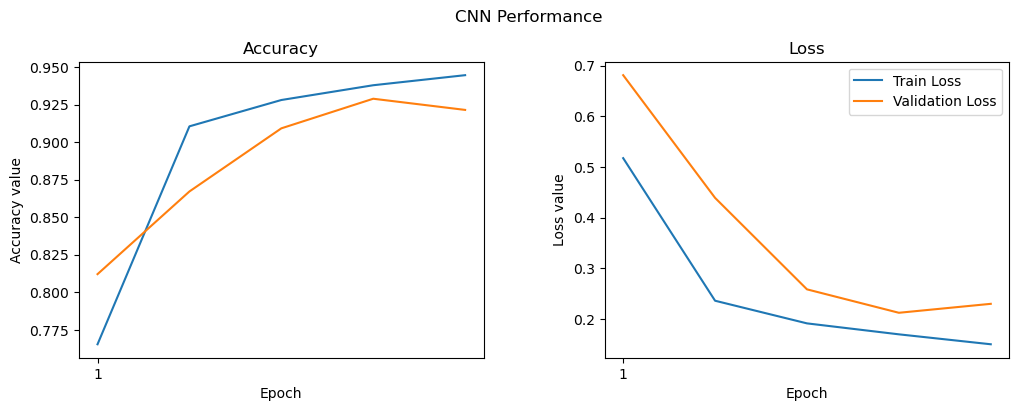

In [31]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (12,4))
t = f.suptitle('CNN Performance', fontsize = 12)
f.subplots_adjust(top = 0.85, wspace = 0.3)

max_epoch = len(history.history['accuracy']) + 1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label  = 'Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label  = 'Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch,5))
ax1.set_ylabel('Accuracy value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

ax2.plot(epoch_list, history.history['loss'], label = 'Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label = 'Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch,5))
ax2.set_ylabel('Loss value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc= 'best')

In [32]:
model.save("../Project/malaria_cell_detection.h5")


C:\Users\lenovo\anaconda3\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
